<h1><center><span style='color:black'>Appendix</span></center></h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### REading dataset

In [2]:
data=pd.read_csv('data.csv',on_bad_lines='skip') #to skip the lines consisting parser
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [4]:
data.shape

(669640, 2)

#### code to check all the missing values in my dataset

In [5]:
data.isna().sum() #to count null values in a dataset

password    1
strength    0
dtype: int64

In [6]:
data[data['password'].isnull()] # null value in password column

,password,strength
367579,NaN,0


In [7]:
data.dropna(inplace=True) # drop null value

In [8]:
data.isnull().sum() #check the null value

password    0
strength    0
dtype: int64

<Axes: xlabel='strength', ylabel='count'>

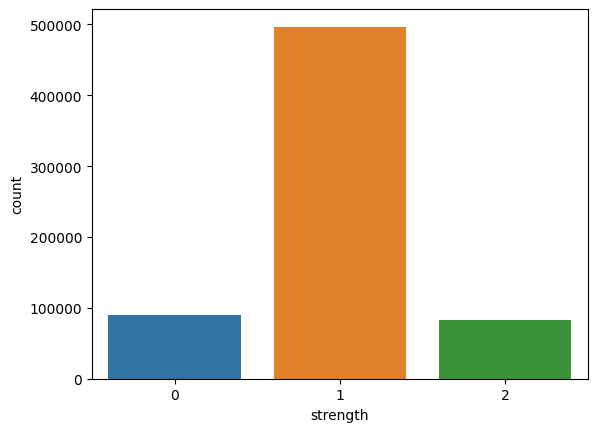

In [9]:
sns.countplot(x=data["strength"]) #count of different strengths

In [10]:
password_tuple=np.array(data) #data representation in the form of an array

In [11]:
password_tuple #displaying the array

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

#### shuffling randomly for robustness

In [12]:
import random
random.shuffle(password_tuple) #shuffle array

In [13]:
x=[labels[0] for labels in password_tuple] #0 is index of password
y=[labels[1] for labels in password_tuple] # 1 is index of strength for list comprehension
# y contains dependent data 

In [14]:
x

['kzde5577',
 'kino3434',
 'kzde5577',
 'kzde5577',
 'kino3434',
 'megzy123',
 'kzde5577',
 'visi7k1yr',
 'megzy123',
 'as326159',
 'v1118714',
 'megzy123',
 'visi7k1yr',
 'lamborghin1',
 'jerusalem393',
 'kzde5577',
 'AVYq1lDE4MgAZfNt',
 'universe2908',
 'visi7k1yr',
 'sbl571017',
 'g067057895',
 'jytifok873',
 '6975038lp',
 'universe2908',
 'u6c8vhow',
 'megzy123',
 'as326159',
 '0169395484a',
 'intel1',
 'universe2908',
 'as326159',
 'czuodhj972',
 'go7kew7a2po',
 'kino3434',
 'go7kew7a2po',
 'go7kew7a2po',
 'as326159',
 'megzy123',
 'asv5o9yu',
 'g067057895',
 'universe2908',
 'elyass15@ajilent-ci',
 'asgaliu11',
 'czuodhj972',
 'czuodhj972',
 'elyass15@ajilent-ci',
 'juliel009',
 'yitbos77',
 'cigicigi123',
 'g067057895',
 'lamborghin1',
 'universe2908',
 'go7kew7a2po',
 'asv5o9yu',
 'gaymaids1',
 'lamborghin1',
 'visi7k1yr',
 'calcifer32',
 '52558000aaa',
 'faranumar91',
 'exitos2009',
 'a2531106',
 '52558000aaa',
 'bozoxik602',
 'ok>bdk',
 'kino3434',
 'matiofox08',
 'openup12',

#### create a custom function to split input into characters of list

In [15]:
def word_divide_char(inputs): # function to split the letters into list of a password
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [16]:
word_divide_char('kzde5577') # example of the function

['k', 'z', 'd', 'e', '5', '5', '7', '7']

#### import TF-IDF vectorizer to convert String data into numerical data

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)#tokenizer to say on what basis you want to tokenize your data eg: string to achieve a matrix of your data

#### apply TF-IDF vectorizer on data

In [19]:
X=vectorizer.fit_transform(x) #x contains all the passwords

In [20]:
X.shape #contains all independent data (X)

(669639, 124)

In [21]:
vectorizer.get_feature_names_out() #to get all features

array(['\x05', '\x08', '\x10', '\x11', '\x12', '\x16', '\x17', '\x19',
       '\x1b', '\x1c', '\x1e', ' ', '!', '"', '#', '$', '%', '&', '(',
       ')', '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^',
       '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
       'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
       'y', 'z', '{', '|', '}', '~', '\x7f', '\x8d', '¡', '¨', '«', '°',
       '±', '²', '³', '´', 'µ', '¶', '·', '¹', 'º', '¾', '¿', '×', 'ß',
       'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ê', 'í', 'î', 'ð', 'ñ', 'ò',
       'ó', 'ô', 'õ', 'ö', '÷', 'ù', 'ú', 'û', 'ü', 'ý', 'þ', 'ÿ', '—',
       '‚', '™'], dtype=object)

In [22]:
first_document_vector=X[0] # to see the object of that data in feature form
first_document_vector

<1x124 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [23]:
first_document_vector.T.todense() #data having its importance with each and every feature

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56630272],
        [0.        ],
        [0.59201502],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [24]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names_out(),columns=['TF-IDF']) #TF matrix
df.sort_values(by=['TF-IDF'],ascending=False) #sort the data on basis of importance in descending

,TF-IDF
7,0.592015
5,0.566303
z,0.336359
k,0.291579
d,0.285900
...,...
=,0.000000
<,0.000000
;,0.000000
9,0.000000


#### split data into train & test
    train---> To learn the relationship within data, 
    test-->  To do predictions, and this testing data will be unseen to my model

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)#test_size=0.2 means 20% of data is considered for testing other 80% for training

In [27]:
X_train.shape

(535711, 124)

In [28]:
from sklearn.linear_model import LogisticRegression

#### Apply Logistic on data as use-cas is Classification

In [29]:
clf=LogisticRegression(random_state=0,multi_class='multinomial')#multinomial because having more then 2 categories in the data i.e. 0,1,2

In [30]:
clf.fit(X_train,y_train) #fit the data

LogisticRegression(multi_class='multinomial', random_state=0)

In [31]:
from datetime import datetime
start = datetime.now()

#### doing prediction for specific custom data

In [32]:
dt=np.array(['Parth@99999']) #consider an array of test password
pred=vectorizer.transform(dt) #vectorizer for converting string to numeric
clf.predict(pred) #to predict the strength of the password

array([1])

In [33]:
end=datetime.now()
td=(end-start).total_seconds()*10**3
print(f"The time of execution is : {td:.03f}ms")

The time of execution is : 19.257ms


#### doing prediction on X-Test data

In [34]:
y_pred=clf.predict(X_test) #for the 20% data
y_pred #20% data predicted array

array([1, 1, 1, ..., 1, 1, 0])

#### check Accuracy of your model using confusion_matrix,accuracy_score

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [36]:
cm=confusion_matrix(y_test,y_pred) # both data of test and pred
print(cm)
print(accuracy_score(y_test,y_pred)) #same arrays

[[ 5287 12755    17]
 [ 3746 93062  2591]
 [   30  5128 11312]]
0.8188056269040082


In [37]:
# 5318, 92752, 11370 are true prediction wheras others are false pred. therefore accuracy is 82%

##### create report of your model

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.29      0.39     18059
           1       0.84      0.94      0.88     99399
           2       0.81      0.69      0.74     16470

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928



In [39]:
# model is good if we use advance classifier can increase the accuracy or by hypertuning the model

In [40]:
#Suggestive password maker
import re
def check_password_strength(password):
    score = 0
    suggestions = []

    # check length
    if len(password) >= 8:
        score += 1
    else:
        suggestions.append("Password should be at least 8 characters long")

    # check for uppercase letter
    if re.search(r"[A-Z]", password):
        score += 1
    else:
        suggestions.append("Password should contain at least one uppercase letter")

    # check for lowercase letter
    if re.search(r"[a-z]", password):
        score += 1
    else:
        suggestions.append("Password should contain at least one lowercase letter")

    # check for numeric digit
    if re.search(r"\d", password):
        score += 1
    else:
        suggestions.append("Password should contain at least one numeric digit")

    # check for special character
    if re.search(r"[!@#$%^&*,.?\":{}|<>_]", password):
        score += 1
    else:
        suggestions.append("Password should contain at least one special character (!@#$%^&*(),.?\":{}|<>)")
    #consecutive letter check
    if any(c1 == c2 for c1, c2 in zip(password, password[1:])):
        suggestions.append("Password has consecutive occurences, Kindly update with new characters")
    else:
        score += 1
    if score== 0 or 1 or 2 or 3:
        score = 0
    elif score == 4 or 5:
        score = 1
    else:
        score = 2
    return score, suggestions
password = np.array_str(dt)
print(check_password_strength(password))

(0, ['Password has consecutive occurences, Kindly update with new characters'])


In [41]:
from datetime import datetime
 
# record current timestamp
start = datetime.now()
MIN_PASSWORD_LENGTH = 6
MAX_PASSWORD_LENGTH = 16
def password_func(ls):
    password = input("Please enter your password: ")
    if len(password) < MIN_PASSWORD_LENGTH or len(password) > MAX_PASSWORD_LENGTH:
        message = "Password should have more than 6 but less 10 characters"
        print(message)
        ls.append(message)
        return password_func(ls)
    elif password.isalpha():
        message = "password weak – contains only letters"
        print(message)
        ls.append(message)
        return password_func(ls)
    elif password.isnumeric():
        message = "password weak – contains only numbers"
        print(message)
        ls.append(message)
        return password_func(ls)
    else:
        return ls.append("strong")
ls = []
password_func(ls)
print("")
print("error messages")
print(*ls,sep='\n')
end = datetime.now()
 
# find difference loop start and end time and display
td = (end - start).total_seconds() * 10**3
print(f"The time of execution of above program is : {td:.03f}ms")

Please enter your password: Parth@99999

error messages
strong
The time of execution of above program is : 178130.428ms
